# Project 2
## BUAN 6341.002 
## Group 30
### Navarurh Kumar (NXK180010)
### Spandhan Kumar Kancham (SRK170003)

### <font color='red'> Project 2

Project Description:
- Use same datasets as Project 1.
- Preprocess data: Explore data and apply data scaling.

Regression Task:
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 1, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Classification Task:
- Apply two voting classifiers - one with hard voting and one with soft voting
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. Compare your results with results in project 1. You don't need to apply all the models twice. Just copy the result table from project 1, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Deliverables:
- Use markdown to provide inline comments for this project.
- Your outputs should be clearly executed in the notebook i.e. we should not need to rerun the code to obtain the outputs.
- Visualization encouraged.
- If you are submitting two different files, then please only one group member submit both the files. If you submit two files separately from different accounts, it will be submitted as two different attempts.
- If you are submitting two different files, then please follow below naming convetion:
    Project2_Regression_GroupXX_Firstname1_Firstname2.ipynb
    Project2_Classification_GroupXX_Firstname1_Firstname2.ipynb
- If you are submitting single file, then please follow below naming convetion:
    Project2_Both_GroupXX_Firstname1_Firstname2.ipynb

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

## Importing final dataset from previous project

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# read in data files
raw_data = pd.read_csv('finaldata.csv')

In [2]:
raw_data.head()

,sector_score,location_id,para_a,score_a,risk_a,para_b,score_b,risk_b,total,numbers,...,inherent_risk,control_risk,audit_risk,risk,marks,money_marks,district,loss,loss_score,history_score
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,8.574,0.4,1.7148,1,2,2,2,0,2,2
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,2.554,0.4,0.5108,0,2,2,2,0,2,2
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,1.548,0.4,0.3096,0,2,2,2,0,2,2
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,17.530,0.4,3.5060,1,6,6,2,0,2,2
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,1.416,0.4,0.2832,0,2,2,2,0,2,2


In [3]:
x = raw_data.drop(['audit_risk','risk'],axis=1)
y_reg = raw_data['audit_risk']
y_class = raw_data['risk']

#### Removing correlated columns based on project 1 analysis

In [4]:
x = x.drop(['para_a','para_b','score_b.1','money_value','total','history','loss',
            'numbers','district_loss','score','inherent_risk','prob','district',
            'loss_score','prob.1','money_marks','marks','history_score'],axis=1)

In [5]:
x.shape

(775, 12)

#### Creating train test splits for regression and classification techniques
#### Using minmax scaler as the data is non-gaussian

In [6]:
from sklearn.model_selection import train_test_split

# default is 75% / 25% train-test split
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x,  y_reg, random_state=0)
x_train_class, x_test_class, y_train_class, y_test_class = train_test_split(x, y_class, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_train_reg = scaler.fit_transform(x_train_reg)
x_test_reg = scaler.transform(x_test_reg)

x_train_class = scaler.fit_transform(x_train_class)
x_test_class = scaler.transform(x_test_class)

# Classification Models

### Gradient boosted Decision Tree

In [7]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(random_state = 0, max_leaf_nodes = 15, n_estimators = 200, max_depth = 7, learning_rate = 0.1)
clf.fit(x_train_class, y_train_class)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=7,
              max_features=None, max_leaf_nodes=15,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [8]:
print('Accuracy of Training: {:.2f}'.format(clf.score(x_train_class, y_train_class)))

from sklearn.metrics import recall_score, accuracy_score

y_predict = clf.predict(x_test_class)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test_class, y_predict)))
print('Recall: {:.5f}'.format(recall_score(y_test_class, y_predict, average="weighted")))

from sklearn.metrics import classification_report

print(classification_report(y_test_class, y_predict))

Accuracy of Training: 1.00
Accuracy: 0.94
Recall: 0.93814
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       116
           1       0.95      0.90      0.92        78

   micro avg       0.94      0.94      0.94       194
   macro avg       0.94      0.93      0.94       194
weighted avg       0.94      0.94      0.94       194



### Bagging Methods - KNN and Logistic

### Bagging - KNN

In [9]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

bag_clf = BaggingClassifier(
    KNeighborsClassifier(n_neighbors = 5),
    bootstrap=True, n_jobs=-1, n_estimators=500, max_samples=100, random_state=10)

bag_clf.fit(x_train_class, y_train_class)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
         random_state=10, verbose=0, warm_start=False)

In [10]:
print('Accuracy of Training: {:.2f}'.format(bag_clf.score(x_train_class, y_train_class)))

y_predict = bag_clf.predict(x_test_class)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test_class, y_predict)))
print('Recall: {:.5f}'.format(recall_score(y_test_class, y_predict, average="weighted")))

print(classification_report(y_test_class, y_predict))

Accuracy of Training: 0.91
Accuracy: 0.86
Recall: 0.85567
              precision    recall  f1-score   support

           0       0.81      1.00      0.89       116
           1       1.00      0.64      0.78        78

   micro avg       0.86      0.86      0.86       194
   macro avg       0.90      0.82      0.84       194
weighted avg       0.88      0.86      0.85       194



### Bagging - Logistic

In [11]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

bag_clf = BaggingClassifier(
    LogisticRegression(C = 10),
    bootstrap=True, n_jobs=-1, n_estimators=500, max_samples=100, random_state=10)

bag_clf.fit(x_train_class, y_train_class)

BaggingClassifier(base_estimator=LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
         random_state=10, verbose=0, warm_start=False)

In [12]:
print('Accuracy of Training: {:.2f}'.format(bag_clf.score(x_train_class, y_train_class)))

y_predict = bag_clf.predict(x_test_class)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test_class, y_predict)))
print('Recall: {:.5f}'.format(recall_score(y_test_class, y_predict, average="weighted")))

print(classification_report(y_test_class, y_predict))

Accuracy of Training: 0.95
Accuracy: 0.92
Recall: 0.92268
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       116
           1       1.00      0.81      0.89        78

   micro avg       0.92      0.92      0.92       194
   macro avg       0.94      0.90      0.92       194
weighted avg       0.93      0.92      0.92       194



## Pasting

### Decision Tree with Pasting

In [13]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=0)
bag_clf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=100, bootstrap=False, random_state=0)

bag_clf.fit(x_train_class, y_train_class)
y_predict_class = bag_clf.predict(x_test_class)

from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test_class, y_predict_class))
bag_clf.fit(x_train_class, y_train_class)
print('Train score: {:.2f}'.format(bag_clf.score(x_train_class, y_train_class)))
print('Test score: {:.2f}'.format(bag_clf.score(x_test_class, y_test_class)))

0.979381443298969
Train score: 0.99
Test score: 0.98


In [14]:
tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(x_train_class, y_train_class)
y_predict_tree = tree_clf.predict(x_test_class)
print(accuracy_score(y_test_class, y_predict_tree))

0.9381443298969072


In [15]:
depth_range = [1,2,3,4,5,6,7,8,9,10]
train_score = []
test_score = []

for d in depth_range:
    bag_clf.fit(x_train_class, y_train_class)
    train_score.append(bag_clf.score(x_train_class, y_train_class))
    test_score.append(bag_clf.score(x_test_class, y_test_class))

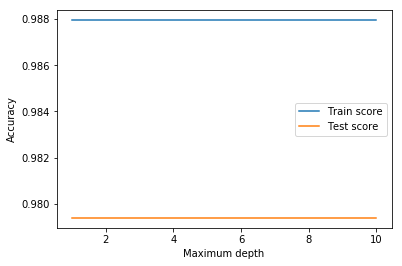

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(depth_range, train_score, label = 'Train score')
plt.plot(depth_range, test_score, label = 'Test score')
plt.legend()
plt.xlabel('Maximum depth')
plt.ylabel('Accuracy')
plt.show()

### Random Forest classifier with Pasting

In [17]:
dt_clf = DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=0)
bag_clf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=1.0, bootstrap=False, n_jobs=-1, random_state=0)
bag_clf.fit(x_train_class, y_train_class)
y_pred = bag_clf.predict(x_test_class)
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=0)
rnd_clf.fit(x_train_class, y_train_class)

y_predict_rf = rnd_clf.predict(x_test_class)
np.sum(y_predict_tree == y_predict_rf ) / len(y_predict_tree)

0.9639175257731959

In [18]:
rnd_clf.feature_importances_

array([0.02286834, 0.01246013, 0.0590014 , 0.10378253, 0.08511986,
       0.18569638, 0.00373858, 0.14534832, 0.18565793, 0.08780286,
       0.00134287, 0.1071808 ])

## ADAboost

### Adaboost - Logistic

In [19]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

ada_clf = AdaBoostClassifier(
    LogisticRegression(C = 10),
    n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(x_train_class, y_train_class)

print('Accuracy of Training: {:.2f}'.format(ada_clf.score(x_train_class, y_train_class)))

y_predict = ada_clf.predict(x_test_class)
print('Recall: {:.5f}'.format(recall_score(y_test_class, y_predict, average="weighted")))
print('Accuracy: {:.2f}'.format(accuracy_score(y_test_class, y_predict)))

print(classification_report(y_test_class, y_predict))

Accuracy of Training: 0.97
Recall: 0.97423
Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       116
           1       1.00      0.94      0.97        78

   micro avg       0.97      0.97      0.97       194
   macro avg       0.98      0.97      0.97       194
weighted avg       0.98      0.97      0.97       194



### Adaboost - Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth = 7),
    n_estimators=200,
    algorithm="SAMME", learning_rate=0.5, random_state=42)
ada_clf.fit(x_train_class, y_train_class)

print('Accuracy of Training: {:.2f}'.format(ada_clf.score(x_train_class, y_train_class)))

y_predict = ada_clf.predict(x_test_class)
print('Recall: {:.5f}'.format(recall_score(y_test_class, y_predict, average="weighted")))
print('Accuracy: {:.2f}'.format(accuracy_score(y_test_class, y_predict)))

print(classification_report(y_test_class, y_predict))

Accuracy of Training: 1.00
Recall: 0.94330
Accuracy: 0.94
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       116
           1       0.95      0.91      0.93        78

   micro avg       0.94      0.94      0.94       194
   macro avg       0.94      0.94      0.94       194
weighted avg       0.94      0.94      0.94       194



## Voting Classifiers

### Hard voting

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(
estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],voting='hard')
voting_clf.fit(x_train_class, y_train_class)

from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(x_train_class, y_train_class)
    y_predict = clf.predict(x_test_class)
    print(clf.__class__.__name__, accuracy_score(y_test_class, y_predict))

LogisticRegression 0.9175257731958762
RandomForestClassifier 0.9587628865979382
SVC 0.9175257731958762
VotingClassifier 0.9278350515463918


### Soft voting

In [22]:
svm_clf = SVC(probability=True)
voting_clf = VotingClassifier(
estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],voting='soft')
voting_clf.fit(x_train_class, y_train_class)

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(x_train_class, y_train_class)
    y_predict = clf.predict(x_test_class)
    print(clf.__class__.__name__, accuracy_score(y_test_class, y_predict))

LogisticRegression 0.9175257731958762
RandomForestClassifier 0.9742268041237113
SVC 0.9175257731958762
VotingClassifier 0.9587628865979382


## PCA

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
x_train_pca = pca.fit_transform(x_train_class)
x_test_pca  = pca.transform(x_test_class)

#### PCA - 95% variation is explained by 7 variables reducing the feature set from 12 to 7

### Running classification models on PCA output

### K Neighbors Classifier

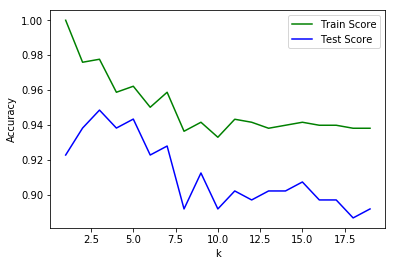

In [24]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(x_train_pca, y_train_class)
    train_score_array.append(knn.score(x_train_pca, y_train_class))
    test_score_array.append(knn.score(x_test_pca, y_test_class))
    
import matplotlib.pyplot as plt
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [25]:
knn = KNeighborsClassifier(3)
knn.fit(x_train_pca, y_train_class)
print('Train score: {:.4f}'.format(knn.score(x_train_pca, y_train_class)))
print('Test score: {:.4f}'.format(knn.score(x_test_pca, y_test_class)))

Train score: 0.9776
Test score: 0.9485


In [26]:
from sklearn.metrics import roc_auc_score

y_knn_predict = knn.predict(x_test_pca)
y_knn_train_predict = knn.predict(x_train_pca)
print('Train PCA Data roc_auc_score: %.4f'%roc_auc_score(y_knn_train_predict, y_train_class))
print('Test PCA Data roc_auc_score: %.4f '%roc_auc_score(y_knn_predict, y_test_class))

y_predicted = knn.predict(x_test_pca)
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test_class, y_predicted)

print('\n KNN classifier on PCA Data data\n', confusion )

print('\n\n\nTrain Original Data roc_auc_score: 0.9871\n'
'Test Original Data roc_auc_score: 0.9640\n\n'
' KNN classifier on Original Data from project 1\n'
' [[116   0]\n'
' [  9  69]]')


Train PCA Data roc_auc_score: 0.9785
Test PCA Data roc_auc_score: 0.9603 

 KNN classifier on PCA Data data
 [[116   0]
 [ 10  68]]



Train Original Data roc_auc_score: 0.9871
Test Original Data roc_auc_score: 0.9640

 KNN classifier on Original Data from project 1
 [[116   0]
 [  9  69]]


#### We see that the PCA modifications have improved the score marginally in this case

### Logistic Regression

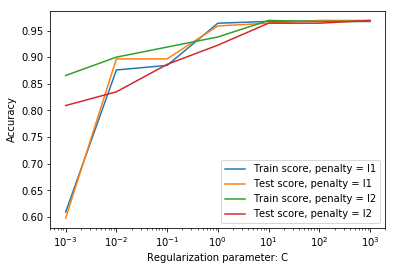

In [27]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(x_train_pca, y_train_class)
    log_l2.fit(x_train_pca, y_train_class)
    train_score_l1.append(log_l1.score(x_train_pca, y_train_class))
    train_score_l2.append(log_l2.score(x_train_pca, y_train_class))
    test_score_l1.append(log_l1.score(x_test_pca, y_test_class))
    test_score_l2.append(log_l2.score(x_test_pca, y_test_class))
    
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [28]:
y_log_predict = log_l1.predict(x_test_pca)
y_log_train_predict = log_l1.predict(x_train_pca)
print('Train PCA Data roc_auc_score: %.4f'%roc_auc_score(y_log_train_predict, y_train_class))
print('Test PCA Data roc_auc_score: %.4f '%roc_auc_score(y_log_predict, y_test_class))

y_predicted = log_l1.predict(x_test_pca)
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test_class, y_predicted)

print('\n Logistic regression classifier on PCA Data (default settings)\n', confusion )

print('\n\n\nTrain Original Data roc_auc_score: 0.9928\n'
'Test Original Data roc_auc_score: 0.9915\n\n'
' Logistic regression classifier on Original Data (default settings)\n'
' [[116   0]\n'
' [  2  76]]')


Train PCA Data roc_auc_score: 0.9675
Test PCA Data roc_auc_score: 0.9754 

 Logistic regression classifier on PCA Data (default settings)
 [[116   0]
 [  6  72]]



Train Original Data roc_auc_score: 0.9928
Test Original Data roc_auc_score: 0.9915

 Logistic regression classifier on Original Data (default settings)
 [[116   0]
 [  2  76]]


#### Here we see that the original dataset without feature selection using PCA gives us a better score

### Support Vector Classifier

Text(0, 0.5, 'Accuracy')

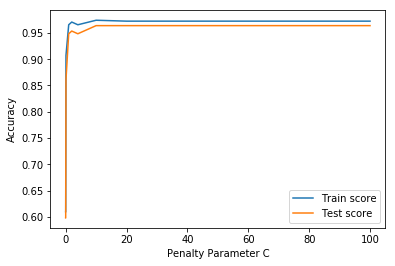

In [29]:
from sklearn.svm import SVC
c_range = [0.001,0.01,0.1,1,2,4,10,20,40,80,100]
train_score = []
test_score = []

for c in c_range:
    clf = SVC(gamma='auto',C=c)
    clf.fit(x_train_pca,y_train_class)
    train_score.append(clf.score(x_train_pca, y_train_class))
    test_score.append(clf.score(x_test_pca, y_test_class))
    
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score, label = 'Train score')
plt.plot(c_range, test_score, label = 'Test score')
plt.legend()
plt.xlabel('Penalty Parameter C')
plt.ylabel('Accuracy')

In [30]:
y_linsvc_predict = clf.predict(x_test_pca)
y_linsvc_train_predict = clf.predict(x_train_pca)
print('Train PCA Data roc_auc_score: %.4f'%roc_auc_score(y_linsvc_train_predict, y_train_class))
print('Test PCA Data roc_auc_score: %.4f '%roc_auc_score(y_linsvc_predict, y_test_class))

y_predicted = clf.predict(x_test_pca)
confusion = confusion_matrix(y_test_class, y_predicted)

print('\n Linear SVC on PCA Data\n', confusion )

print(
'\n\n\nTrain Original Data roc_auc_score: 0.9726\n'
'Test Original Data roc_auc_score: 0.9715\n\n'
' Linear SVC on Original Data\n'
' [[116   0]\n'
' [  7  71]]')


Train PCA Data roc_auc_score: 0.9726
Test PCA Data roc_auc_score: 0.9715 

 Linear SVC on PCA Data
 [[116   0]
 [  7  71]]



Train Original Data roc_auc_score: 0.9726
Test Original Data roc_auc_score: 0.9715

 Linear SVC on Original Data
 [[116   0]
 [  7  71]]


In [31]:
print('PCA Info')
print(max(train_score))
print(max(test_score))
print(test_score[10])

print('\nOriginal Data Info')
print('0.9741824440619621')
print('0.9639175257731959')
print('0.9639175257731959')

print('Both are exactly the same, so feature engineering using PCA had no effect on the support vector classifier')

PCA Info
0.9741824440619621
0.9639175257731959
0.9639175257731959

Original Data Info
0.9741824440619621
0.9639175257731959
0.9639175257731959
Both are exactly the same, so feature engineering using PCA had no effect on the support vector classifier


### Kernelized SVC - Linear

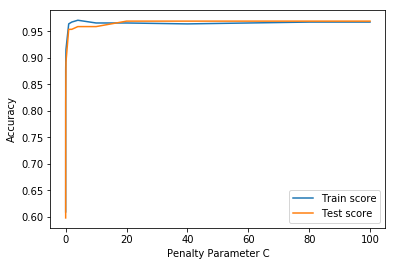

In [32]:
train_score = []
test_score = []

for c in c_range:
    clf = SVC(gamma='auto',C=c,kernel='linear')
    clf.fit(x_train_pca,y_train_class)
    train_score.append(clf.score(x_train_pca, y_train_class))
    test_score.append(clf.score(x_test_pca, y_test_class))
    
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score, label = 'Train score')
plt.plot(c_range, test_score, label = 'Test score')
plt.legend()
plt.xlabel('Penalty Parameter C')
plt.ylabel('Accuracy')

y_predicted = clf.predict(x_test_pca)
confusion = confusion_matrix(y_test_class, y_predicted)

In [33]:
print('\n Linear Kernelized SVM on PCA Data\n', confusion )

print(
'\n\n Linear Kernelized SVM on test data\n'
' [[116   0]\n'
' [  3  75]]')


 Linear Kernelized SVM on PCA Data
 [[116   0]
 [  6  72]]


 Linear Kernelized SVM on test data
 [[116   0]
 [  3  75]]


#### The linear kernelized SVC shows better results for original data

### Kernelized SVC - Sigmoid

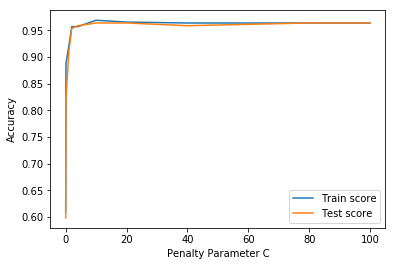

In [34]:
train_score = []
test_score = []

for c in c_range:
    clf = SVC(gamma='auto',C=c,kernel='sigmoid')
    clf.fit(x_train_pca,y_train_class)
    train_score.append(clf.score(x_train_pca, y_train_class))
    test_score.append(clf.score(x_test_pca, y_test_class))
    
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score, label = 'Train score')
plt.plot(c_range, test_score, label = 'Test score')
plt.legend()
plt.xlabel('Penalty Parameter C')
plt.ylabel('Accuracy')

y_predicted = clf.predict(x_test_pca)
confusion = confusion_matrix(y_test_class, y_predicted)

In [35]:
print('\n Sigmoid Kernelized SVM on PCA Data\n', confusion )

print(
'\n\n Sigmoid Kernelized SVM on test data\n'
' [[116   0]\n'
' [  7  71]]')


 Sigmoid Kernelized SVM on PCA Data
 [[116   0]
 [  7  71]]


 Sigmoid Kernelized SVM on test data
 [[116   0]
 [  7  71]]


#### The sigmoid kernelized SVC shows the same result for PCA and Original data

### Kernelized SVC - RBF

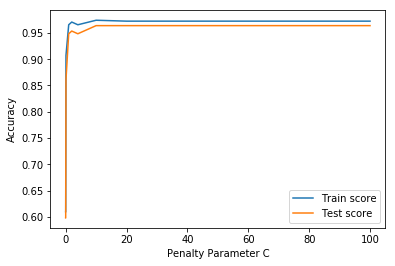

In [36]:
train_score = []
test_score = []

for c in c_range:
    clf = SVC(gamma='auto',C=c,kernel='rbf')
    clf.fit(x_train_pca,y_train_class)
    train_score.append(clf.score(x_train_pca, y_train_class))
    test_score.append(clf.score(x_test_pca, y_test_class))
    
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score, label = 'Train score')
plt.plot(c_range, test_score, label = 'Test score')
plt.legend()
plt.xlabel('Penalty Parameter C')
plt.ylabel('Accuracy')

y_predicted = clf.predict(x_test_pca)
confusion = confusion_matrix(y_test_class, y_predicted)

In [37]:
print('\n RBF Kernelized SVM on PCA Data\n', confusion )

print(
'\n\n RBF Kernelized SVM on test data\n'
' [[116   0]\n'
' [  7  71]]')


 RBF Kernelized SVM on PCA Data
 [[116   0]
 [  7  71]]


 RBF Kernelized SVM on test data
 [[116   0]
 [  7  71]]


#### The RBF kernelized SVC shows the same result for PCA and Original data

### Kernelized SVC - Poly

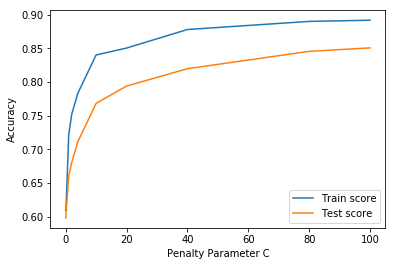

In [38]:
train_score = []
test_score = []

for c in c_range:
    clf = SVC(gamma='auto',C=c,kernel='poly')
    clf.fit(x_train_pca,y_train_class)
    train_score.append(clf.score(x_train_pca, y_train_class))
    test_score.append(clf.score(x_test_pca, y_test_class))
    
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score, label = 'Train score')
plt.plot(c_range, test_score, label = 'Test score')
plt.legend()
plt.xlabel('Penalty Parameter C')
plt.ylabel('Accuracy')

y_predicted = clf.predict(x_test_pca)
confusion = confusion_matrix(y_test_class, y_predicted)

In [39]:
print('\n Poly Kernelized SVC on PCA Data\n', confusion )

print(
'\n\n Poly Kernelized SVC on test data\n'
' [[116   0]\n'
' [  42  36]]')


 Poly Kernelized SVC on PCA Data
 [[116   0]
 [ 29  49]]


 Poly Kernelized SVC on test data
 [[116   0]
 [  42  36]]


#### The Poly kernelized SVC shows better results for PCA data

### Grid Search kernelized SVC

In [40]:
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC
param_grid = {'C':[0.1, 1, 10,100], 'gamma': [0.01, 0.1, 1, 10,100]}
svc = SVC()
grid_svc = GridSearchCV(svc, param_grid, cv=5, scoring='roc_auc', return_train_score=True)
grid_svc.fit(x_train_pca, y_train_class)
print("Best parameters: {}".format(grid_svc.best_params_))

Best parameters: {'C': 100, 'gamma': 0.01}


In [41]:
print('Output for PCA Data\n')
print('Train score: {:.4f}'.format(grid_svc.score(x_train_pca,y_train_class)))
print('Test score: {:.4f}'.format(grid_svc.score(x_test_pca, y_test_class)))
print('Mean Train Score',grid_svc.cv_results_['mean_train_score'])
print('Mean Test Score',grid_svc.cv_results_['mean_test_score'])

print('\n\nOutput for Original Data from Project 1\n')
print('Train score: 0.9980\n'
'Test score: 0.9991\n'
'Mean Train Score [0.95628916 0.96601312 0.98944599 0.99131905 0.9985448  0.96426134\n'
' 0.99077102 0.99429851 0.99868137 0.99998831 0.98975396 0.9952848\n'
' 0.99887254 0.9999961  1.         0.99529285 0.9976417  0.99984836\n'
' 1.         1.        ]\n'
'Mean Test Score [0.9562852  0.96570408 0.98776173 0.97959112 0.97734058 0.964265\n'
' 0.98875041 0.99089995 0.98166251 0.98340855 0.98743702 0.99457896\n'
' 0.99233147 0.97600882 0.98421413 0.99513589 0.99514407 0.99228436\n'
' 0.97110835 0.9844016 ]')

Output for PCA Data

Train score: 0.9948
Test score: 0.9956
Mean Train Score [0.95619186 0.96597359 0.98936834 0.99045618 0.99502904 0.96458379
 0.99031196 0.99359027 0.99679818 0.99798507 0.98956664 0.99470487
 0.99694478 0.99941307 0.99998054 0.99481435 0.99613334 0.99921752
 0.99993773 1.        ]
Mean Test Score [0.9562852  0.96576553 0.9869452  0.98153275 0.97716828 0.96451781
 0.98824959 0.99108811 0.97968424 0.98015187 0.9873764  0.99395586
 0.99077753 0.97424677 0.98221057 0.99420048 0.99320903 0.98889666
 0.96323392 0.98158893]


Output for Original Data from Project 1

Train score: 0.9980
Test score: 0.9991
Mean Train Score [0.95628916 0.96601312 0.98944599 0.99131905 0.9985448  0.96426134
 0.99077102 0.99429851 0.99868137 0.99998831 0.98975396 0.9952848
 0.99887254 0.9999961  1.         0.99529285 0.9976417  0.99984836
 1.         1.        ]
Mean Test Score [0.9562852  0.96570408 0.98776173 0.97959112 0.97734058 0.964265
 0.98875041 0.99089995 0.98166251 0.98340855 0.987437

In [42]:
y_svc_predict = grid_svc.predict(x_test_pca)
y_svc_train_predict = grid_svc.predict(x_train_pca)
print('Train Original Data roc_auc_score: %.4f'%roc_auc_score(y_svc_train_predict, y_train_class))
print('Test Original Data roc_auc_score: %.4f '%roc_auc_score(y_svc_predict, y_test_class))

y_predicted = grid_svc.predict(x_test_pca)
confusion = confusion_matrix(y_test_class, y_predicted)

print('\n Grid kernelized SVC on PCA Data \n', confusion )

print(
'\n\nTrain PCA Data roc_auc_score: 0.9726\n'
'Test PCA Data roc_auc_score: 0.9715\n\n'
' Grid kernelized SVC on Original Data\n'
' [[116   0]\n'
' [  7  71]]'
)

Train Original Data roc_auc_score: 0.9766
Test Original Data roc_auc_score: 0.9677 

 Grid kernelized SVC on PCA Data 
 [[116   0]
 [  8  70]]


Train PCA Data roc_auc_score: 0.9726
Test PCA Data roc_auc_score: 0.9715

 Grid kernelized SVC on Original Data
 [[116   0]
 [  7  71]]


#### This method shows better results when run using Original Data without PCA feature engineering

## Decision Tree Classifier

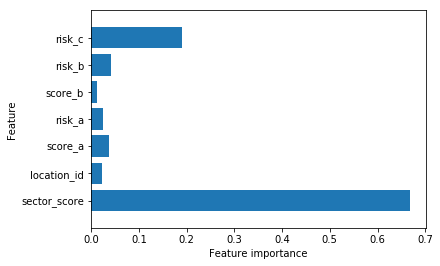

In [43]:
from sklearn.tree import DecisionTreeClassifier
depth_range = [1,2,3,4,5,6,7,8,9,10]
train_score = []
test_score = []

for d in depth_range:
    dtree = DecisionTreeClassifier(random_state=0,max_depth=d)
    dtree.fit(x_train_pca, y_train_class)    
    train_score.append(dtree.score(x_train_pca, y_train_class))
    test_score.append(dtree.score(x_test_pca, y_test_class))
    
%matplotlib inline
def plot_feature_importances(model):
    n_features = x_train_pca.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), list(x))
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(dtree)

#### Here we see a difference in the importance score for features when compared to the original data
#### In the original the highest importance was given to risk_d with over 0.5, a feature that was removed when we ran PCA

Text(0, 0.5, 'Accuracy')

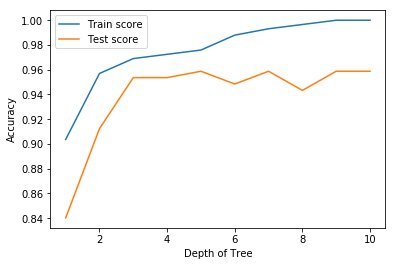

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(depth_range, train_score, label = 'Train score')
plt.plot(depth_range, test_score, label = 'Test score')
plt.legend()
plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy')

In [45]:
y_dtree_predict = dtree.predict(x_test_pca)
y_dtree_train_predict = dtree.predict(x_train_pca)
print('Train PCA Data roc_auc_score: %.4f'%roc_auc_score(y_dtree_train_predict, y_train_class))
print('Test PCA Data roc_auc_score: %.4f '%roc_auc_score(y_dtree_predict, y_test_class))

y_predicted = dtree.predict(x_test_pca)
confusion = confusion_matrix(y_test_class, y_predicted)

print('\n Decision Tree on test data \n', confusion )


print(
'\n\nTrain Original Data roc_auc_score: 1.0000\n'
'Test Original Data roc_auc_score: 0.9396\n'
' Decision Tree on test data\n'
' [[112   4]\n'
' [  8  70]]')


Train PCA Data roc_auc_score: 1.0000
Test PCA Data roc_auc_score: 0.9644 

 Decision Tree on test data 
 [[115   1]
 [  7  71]]


Train Original Data roc_auc_score: 1.0000
Test Original Data roc_auc_score: 0.9396
 Decision Tree on test data
 [[112   4]
 [  8  70]]


#### The scores show that PCA dadta is giving us better scores for Decision Tree classifier model

## Deep Learning Classifier

In [46]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [48]:
m1 = Sequential()
m1.add(Dense(32,input_dim = 12 ,kernel_initializer='normal',activation = 'relu'))
m1.add(Dense(16,input_dim = 12 ,kernel_initializer='normal',activation = 'relu'))
m1.add(Dense(1, activation = 'sigmoid'))
m1.compile(loss= 'binary_crossentropy' , optimizer = 'adam',metrics = ['accuracy'] )
m1.fit(x_train_class, y_train_class, epochs = 50, batch_size = 300)

Epoch 1/50
581/581 [==============================] - 0s 303us/sample - loss: 0.6911 - acc: 0.5714
Epoch 2/50
581/581 [==============================] - 0s 5us/sample - loss: 0.6888 - acc: 0.7676
Epoch 3/50
581/581 [==============================] - 0s 7us/sample - loss: 0.6868 - acc: 0.9002
Epoch 4/50
581/581 [==============================] - 0s 7us/sample - loss: 0.6847 - acc: 0.8967
Epoch 5/50
581/581 [==============================] - 0s 7us/sample - loss: 0.6826 - acc: 0.9053
Epoch 6/50
581/581 [==============================] - 0s 7us/sample - loss: 0.6803 - acc: 0.9329
Epoch 7/50
581/581 [==============================] - 0s 5us/sample - loss: 0.6780 - acc: 0.9363
Epoch 8/50
581/581 [==============================] - 0s 7us/sample - loss: 0.6754 - acc: 0.9398
Epoch 9/50
581/581 [==============================] - 0s 7us/sample - loss: 0.6727 - acc: 0.9398
Epoch 10/50
581/581 [==============================] - 0s 10us/sample - loss: 0.6698 - acc: 0.9398
Epoch 11/50
581/581 [=====

In [49]:
print(m1.evaluate(x_train_class, y_train_class))
print(m1.evaluate(x_test_class, y_test_class))

581/581 [==============================] - 0s 120us/sample - loss: 0.2951 - acc: 0.9587
[0.2951494650770998, 0.9586919]
194/194 [==============================] - 0s 36us/sample - loss: 0.3316 - acc: 0.9381
[0.3316367127231716, 0.9381443]


In [50]:
m2 = Sequential()
m2.add(Dense(20, input_dim = 12, activation = 'relu'))
m2.add(Dense(10, activation = 'relu'))
m2.add(Dense(5, activation = 'relu'))
m2.add(Dense(1, activation = 'sigmoid'))
m2.compile(loss= 'binary_crossentropy' , optimizer = 'adam',metrics = ['accuracy'] )
m2.fit(x_train_class, y_train_class, epochs = 30, batch_size = 150)

Epoch 1/30
581/581 [==============================] - 0s 359us/sample - loss: 0.6968 - acc: 0.3614
Epoch 2/30
581/581 [==============================] - 0s 12us/sample - loss: 0.6921 - acc: 0.5473
Epoch 3/30
581/581 [==============================] - 0s 14us/sample - loss: 0.6901 - acc: 0.6059
Epoch 4/30
581/581 [==============================] - 0s 15us/sample - loss: 0.6884 - acc: 0.6093
Epoch 5/30
581/581 [==============================] - 0s 15us/sample - loss: 0.6866 - acc: 0.6282
Epoch 6/30
581/581 [==============================] - 0s 14us/sample - loss: 0.6842 - acc: 0.6661
Epoch 7/30
581/581 [==============================] - 0s 14us/sample - loss: 0.6811 - acc: 0.6867
Epoch 8/30
581/581 [==============================] - 0s 14us/sample - loss: 0.6771 - acc: 0.7349
Epoch 9/30
581/581 [==============================] - 0s 14us/sample - loss: 0.6720 - acc: 0.7590
Epoch 10/30
581/581 [==============================] - 0s 14us/sample - loss: 0.6664 - acc: 0.7659
Epoch 11/30
581/58

In [51]:
print(m2.evaluate(x_train_class, y_train_class))
print(m2.evaluate(x_test_class, y_test_class))

581/581 [==============================] - 0s 127us/sample - loss: 0.4107 - acc: 0.9243
[0.4106766384563019, 0.9242685]
194/194 [==============================] - 0s 31us/sample - loss: 0.4270 - acc: 0.9485
[0.4270086227004061, 0.9484536]


# Regression Models

## Gradient Boosted ------

In [52]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=3, random_state=0)
param_grid = {'n_estimators': [100, 200], 'learning_rate':[0.5, 1.0]}
grid_gbrt = GridSearchCV(gbrt, param_grid, cv=5, n_jobs=-1, return_train_score=True)
grid_gbrt.fit(x_train_reg, y_train_reg)
train_score = grid_gbrt.score(x_train_reg, y_train_reg)
test_score = grid_gbrt.score(x_test_reg, y_test_reg)
print(train_score)
print(test_score)

0.999999663708779
0.19995045613803397


## Bagging Method

### Linear Regressor with Bagging

In [53]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
bag_lr = BaggingRegressor(lr,n_estimators=500,max_samples=100,random_state=0)
bag_lr.fit(x_train_reg,y_train_reg)
print('Train score: {:.4f}'.format(bag_lr.score(x_train_reg, y_train_reg)))
print('Test score: {:.4f}'.format(bag_lr.score(x_test_reg, y_test_reg)))

Train score: 0.7006
Test score: 0.4638


### KNN Regressor with Bagging

In [54]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
k = KNeighborsRegressor(n_neighbors=2)
bag_reg = BaggingRegressor(k,n_estimators=500,max_samples=100,bootstrap=True,random_state=0)
bag_reg.fit(x_train_reg,y_train_reg)
print('Train score: {:.4f}'.format(bag_reg.score(x_train_reg, y_train_reg)))
print('Test score: {:.4f}'.format(bag_reg.score(x_test_reg, y_test_reg)))

Train score: 0.5449
Test score: 0.0872


## Pasting Method

### Linear Regressor with Pasting

In [55]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
bag_lr = BaggingRegressor(lr,n_estimators=500,max_samples=100,random_state=0,bootstrap=False)
bag_lr.fit(x_train_reg,y_train_reg)
print('Train score: {:.4f}'.format(bag_lr.score(x_train_reg, y_train_reg)))
print('Test score: {:.4f}'.format(bag_lr.score(x_test_reg, y_test_reg)))

Train score: 0.7093
Test score: 0.4657


### KNN Regressor with Pasting

In [56]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
k = KNeighborsRegressor(n_neighbors=2)
bag_knn_reg = BaggingRegressor(k,n_estimators=500,max_samples=100,bootstrap=False,random_state=0)
bag_knn_reg.fit(x_train_reg,y_train_reg)
print('Train score: {:.2f}'.format(bag_knn_reg.score(x_train_reg, y_train_reg)))
print('Test score: {:.2f}'.format(bag_knn_reg.score(x_test_reg, y_test_reg)))

Train score: 0.54
Test score: 0.09


## ADAboost Method

### Linear Regressor with ADAboost

In [57]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
ada_lr = AdaBoostRegressor(lr,n_estimators=200,learning_rate=0.01)
ada_lr.fit(x_train_reg,y_train_reg)
print('Train score: {:.4f}'.format(ada_lr.score(x_train_reg, y_train_reg)))
print('Test score: {:.4f}'.format(ada_lr.score(x_test_reg, y_test_reg)))

Train score: 0.7563
Test score: 0.3329


### KNN Regressor with ADAboost

In [58]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
k = KNeighborsRegressor(n_neighbors=2)

ada_knn = AdaBoostRegressor(k,n_estimators=200,learning_rate=0.01)
ada_knn.fit(x_train_reg,y_train_reg)
print('Train score: {:.2f}'.format(ada_knn.score(x_train_reg, y_train_reg)))
print('Test score: {:.2f}'.format(ada_knn.score(x_test_reg, y_test_reg)))

Train score: 0.99
Test score: 0.11


## PCA

In [59]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_scaled)
X_reduced.shape

(775, 10)

In [60]:
X_reduced_train, X_reduced_test, y_train, y_test = train_test_split(X_reduced, y_reg, random_state=0)

### Linear Regression

In [61]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_reduced_train,y_train)
lin_train=linreg.score(X_reduced_train, y_train)
lin_test=linreg.score(X_reduced_test, y_test)

print("PCA Train Score:",lin_train)
print("PCA Test Score:",lin_test)
print(
'\nOriginal Train Score: 0.7789\n'
'Original Test Score: 0.4314'
)

PCA Train Score: 0.7683508731198982
PCA Test Score: 0.4327198178006896

Original Train Score: 0.7789
Original Test Score: 0.4314


### KNN Regressor

In [62]:
from sklearn.neighbors import KNeighborsRegressor
param_grid = {'n_neighbors': [1, 5, 10, 15, 20]}
grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, return_train_score=True)
grid_knn.fit(X_reduced_train, y_train)
print("Best parameters: {}".format(grid_knn.best_params_))

Best parameters: {'n_neighbors': 1}


c:\users\navarurh\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [63]:
knn_train=grid_knn.score(X_reduced_train, y_train)
knn_test=grid_knn.score(X_reduced_test, y_test)

print("PCA Train Score:",knn_train)
print("PCA Test Score:",knn_test)
print(
'\nOriginal Train Score k-3: 0.8316368053723135\n'
'Original Test Score k-3: 0.1597751627149494\n'
)

PCA Train Score: 1.0
PCA Test Score: 0.13811761170963754

Original Train Score k-3: 0.8316368053723135
Original Test Score k-3: 0.1597751627149494



### Ridge Regressor

In [64]:
from sklearn.linear_model import Ridge
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_ridge = GridSearchCV(Ridge(), param_grid, cv=5, return_train_score=True)
grid_ridge.fit(X_reduced_train, y_train)
print("Best parameters: {}".format(grid_ridge.best_params_))

Best parameters: {'alpha': 100}


c:\users\navarurh\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [65]:
ridge = Ridge(alpha=100)
ridge.fit(X_reduced_train, y_train)
ridge_train = ridge.score(X_reduced_train, y_train)
ridge_test = ridge.score(X_reduced_test, y_test)
print("PCA Train Score:",ridge_train)
print("PCA Test Score:",ridge_test)
print(
'\nOriginal Train Score: 0.5712\n'
'Original Test Score: 0.2791'
)

PCA Train Score: 0.7533187449529662
PCA Test Score: 0.25371798133984214

Original Train Score: 0.5712
Original Test Score: 0.2791


### Lasso Regressor

In [66]:
from sklearn.linear_model import Lasso
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100], 'max_iter':[10000]}
grid_lasso = GridSearchCV(Lasso(), param_grid, cv=5, return_train_score=True)
grid_lasso.fit(X_reduced_train, y_train)
print("Best parameters: {}".format(grid_lasso.best_params_))

Best parameters: {'alpha': 10, 'max_iter': 10000}


c:\users\navarurh\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [67]:
lasso_train=grid_lasso.score(X_reduced_train, y_train)
lasso_test=grid_lasso.score(X_reduced_test, y_test)
print("PCA Train Score:",lasso_train)
print("PCA Test Score:",lasso_test)
print(
'\nOriginal Train Score: 0.7569\n'
'Original Test Score: 0.3404'
)

PCA Train Score: 0.42588771775716305
PCA Test Score: 0.10054176833979755

Original Train Score: 0.7569
Original Test Score: 0.3404


### Linear SVM Regressor

In [68]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR
param_grid = {'C':[0.1, 1, 10], 'epsilon': [0.1, 1, 10]}
grid_linsvm = GridSearchCV(LinearSVR(), param_grid, cv=5, return_train_score=True)
grid_linsvm.fit(X_reduced_train, y_train)
print("Best parameters: {}".format(grid_linsvm.best_params_))

Best parameters: {'C': 0.1, 'epsilon': 1}


c:\users\navarurh\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [69]:
linsvr_train = grid_linsvm.score(X_reduced_train, y_train)
linsvr_test = grid_linsvm.score(X_reduced_test, y_test)

print("PCA Train Score:",linsvr_train)
print("PCA Test Score:",linsvr_test)

PCA Train Score: 0.6105224965804668
PCA Test Score: 0.2473656558825994


### Kernelized-SVM RBF Regressor

In [71]:
from sklearn.svm import SVR
svr_rbf_pca = SVR(kernel='rbf',C=10,gamma=0.01)
svr_rbf_pca.fit(x_train_pca,y_train_reg)
print("PCA Train Score:%.4f"%svr_rbf_pca.score(x_train_pca,y_train_reg))
print("PCA Test Score:%.4f"%svr_rbf_pca.score(x_test_pca,y_test_reg))

PCA Train Score:0.1673
PCA Test Score:0.0285


### Kernelized-SVM Poly Regressor

In [73]:
from sklearn.svm import SVR
svr_poly_pca = SVR(kernel='poly',C=1,gamma=1)
svr_poly_pca.fit(x_train_pca,y_train_reg)
print("PCA Train Score:%.4f"%svr_poly_pca.score(x_train_pca,y_train_reg))
print("PCA Test Score:%.4f"%svr_poly_pca.score(x_test_pca,y_test_reg))

PCA Train Score:0.4414
PCA Test Score:0.2866


### Kernelized-SVM Linear Regressor

In [74]:
from sklearn.svm import SVR
svr_linear_pca = SVR(kernel='linear',C=10,gamma=0.0001)
svr_linear_pca.fit(x_train_pca,y_train_reg)
print("PCA Train Score:%.4f"%svr_poly_pca.score(x_train_pca,y_train_reg))
print("PCA Test Score:%.4f"%svr_poly_pca.score(x_test_pca,y_test_reg))

PCA Train Score:0.4414
PCA Test Score:0.2866


### Polynomial Regression

In [75]:
from  sklearn.preprocessing  import PolynomialFeatures
param_grid = {'degree': [1, 2, 3]}
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_reduced_train)
X_test_poly = poly.transform(X_reduced_test)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
poly_reg = model.fit(X_train_poly, y_train)
poly_train=model.score(X_train_poly, y_train)
poly_test=model.score(X_test_poly, y_test)

In [76]:
print("PCA Train Score:",ridge_train)
print("PCA Test Score:",ridge_test)

print('\n\nOriginal Scores List')
print(
'[0.7788807458845337, 0.9999972687635662]\n'
'[0.4314018618196952, 0.9999998727289102]'
)

PCA Train Score: 0.7533187449529662
PCA Test Score: 0.25371798133984214


Original Scores List
[0.7788807458845337, 0.9999972687635662]
[0.4314018618196952, 0.9999998727289102]


## Mini Report for PCA vs Non-PCA regression

In [77]:
report_table = [['Linear Regression', lin_train,lin_test,'0.7789','0.4314']]
report_table = report_table + [['Polynomial Regression',poly_train, poly_test,'0.9999','0.9999']]
report_table = report_table + [['Ridge Regression',ridge_train, ridge_test,'0.5712','0.2791']]
report_table = report_table + [['Lasso',lasso_train, lasso_test,'0.7569','0.3404']]
report_table = report_table + [['KNN Regressor',knn_train, knn_test,'0.832','0.1597']]
report_table = report_table + [['Linear SVM', linsvr_train, linsvr_test,'0.5802','0.3925']]
report_regression = pd.DataFrame(report_table,columns = ['Model Name', 'PCA Train accuracy', ' PCATest accuracy', 'Without PCA Train accuracy', 'Without PCA Test accuracy'])

report_regression

,Model Name,PCA Train accuracy,PCATest accuracy,Without PCA Train accuracy,Without PCA Test accuracy
0,Linear Regression,0.768351,0.432720,0.7789,0.4314
1,Polynomial Regression,0.997662,0.906999,0.9999,0.9999
2,Ridge Regression,0.753319,0.253718,0.5712,0.2791
3,Lasso,0.425888,0.100542,0.7569,0.3404
4,KNN Regressor,1.000000,0.138118,0.832,0.1597
5,Linear SVM,0.610522,0.247366,0.5802,0.3925


## Deep Learning

In [78]:
m1 = Sequential()
m1.add(Dense(32,input_dim = 12 ,kernel_initializer='normal',activation = 'relu'))
m1.add(Dense(16,input_dim = 12 ,kernel_initializer='normal',activation = 'relu'))
m1.add(Dense(1, activation = 'sigmoid'))
m1.compile(loss= 'mean_absolute_error' , optimizer = 'adam',metrics = ['mean_absolute_error'] )
m1.fit(x_train_reg, y_train_reg, epochs = 50, batch_size = 300)

Epoch 1/50
581/581 [==============================] - 0s 243us/sample - loss: 5.4821 - mean_absolute_error: 5.4821
Epoch 2/50
581/581 [==============================] - 0s 7us/sample - loss: 5.4810 - mean_absolute_error: 5.4810
Epoch 3/50
581/581 [==============================] - 0s 5us/sample - loss: 5.4800 - mean_absolute_error: 5.4800
Epoch 4/50
581/581 [==============================] - 0s 9us/sample - loss: 5.4790 - mean_absolute_error: 5.4790
Epoch 5/50
581/581 [==============================] - 0s 7us/sample - loss: 5.4778 - mean_absolute_error: 5.4778
Epoch 6/50
581/581 [==============================] - 0s 5us/sample - loss: 5.4765 - mean_absolute_error: 5.4765
Epoch 7/50
581/581 [==============================] - 0s 7us/sample - loss: 5.4750 - mean_absolute_error: 5.4750
Epoch 8/50
581/581 [==============================] - 0s 7us/sample - loss: 5.4733 - mean_absolute_error: 5.4733
Epoch 9/50
581/581 [==============================] - 0s 7us/sample - loss: 5.4715 - mean_abso

In [79]:
print(m1.evaluate(x_train_reg, y_train_reg))
print(m1.evaluate(x_test_reg, y_test_reg))

581/581 [==============================] - 0s 125us/sample - loss: 5.2527 - mean_absolute_error: 5.2527
[5.252727670226368, 5.252727]
194/194 [==============================] - 0s 31us/sample - loss: 10.6798 - mean_absolute_error: 10.6798
[10.679806712669196, 10.679807]


In [80]:
m2 = Sequential()
m2.add(Dense(20, input_dim = 12, activation = 'relu'))
m2.add(Dense(10, activation = 'relu'))
m2.add(Dense(5, activation = 'relu'))
m2.add(Dense(1, activation = 'sigmoid'))
m2.compile(loss= 'mean_squared_error' , optimizer = 'adam',metrics = ['accuracy'] )
m2.fit(x_train_reg, y_train_reg, epochs = 30, batch_size = 150)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
581/581 [==============================] - 0s 306us/sample - loss: 309.1669 - acc: 0.0000e+00
Epoch 2/30
581/581 [==============================] - 0s 10us/sample - loss: 308.9829 - acc: 0.0000e+00
Epoch 3/30
581/581 [==============================] - 0s 14us/sample - loss: 308.7866 - acc: 0.0000e+00
Epoch 4/30
581/581 [==============================] - 0s 12us/sample - loss: 308.6162 - acc: 0.0000e+00
Epoch 5/30
581/581 [==============================] - 0s 14us/sample - loss: 308.4347 - acc: 0.0000e+00
Epoch 6/30
581/581 [==============================] - 0s 14us/sample - loss: 308.2564 - acc: 0.0000e+00
Epoch 7/30
581/581 [==============================] - 0s 15us/sample - loss: 308.0400 - acc: 0.0000e+00
Epoch 8/30
581/581 [==============================] - 0s 14us/sample - loss: 307.8368 - acc: 0.0000e+00
Epoch 9/30
581/581 [==============================] - 0s 12us/sample - loss: 307.6230 - acc: 0.0000e+00
Epoch 10/30
581

In [81]:
print(m2.evaluate(x_train_reg, y_train_reg))
print(m2.evaluate(x_test_reg, y_test_reg))

581/581 [==============================] - 0s 156us/sample - loss: 304.5720 - acc: 0.0000e+00
[304.57199509664986, 0.0]
194/194 [==============================] - 0s 36us/sample - loss: 5213.7120 - acc: 0.0000e+00
[5213.711988257071, 0.0]
